#### Faça a leitura do arquivo `movies.csv`

column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)
4. Uma plotagem do genero do filme.
5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']
df = pd.read_csv('/content/movies.csv', sep='|', names=column_names)
df

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,?,Doug Walker,?,?,?,Star Wars: Episode VII - The Force Awakens ...,?,?,?,?,?,7.1,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Color,James Gunn,653.0,121.0,333130696.0,Guardians of the Galaxy,1097.0,USA,PG-13,"170,000,000.0",2014.0,8.1,Action
96,Color,Christopher Nolan,712.0,169.0,187991439.0,Interstellar,2725.0,USA,PG-13,"165,000,000.0",2014.0,8.6,Adventure
97,Color,Christopher Nolan,642.0,148.0,292568851.0,Inception,2803.0,USA,PG-13,"160,000,000.0",2010.0,8.8,Action
98,Color,Hideaki Anno,1.0,120.0,?,Godzilla Resurgence,13.0,Japan,?,?,2016.0,8.2,Action


In [5]:
#1 - Qual o filme com o maior lucro?

df['gross'] = df['gross'].replace('?', 0)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0)
df['budget'] = df['budget'].replace(',', '', regex=True)
df['budget'] = df['budget'].replace('?', 0)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0)

df['lucro'] = df['gross'] - df['budget']

maior_lucro = df['lucro'].max()
print(maior_lucro)

df[df['lucro'] == maior_lucro]

523505847.0


,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,lucro
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action,523505847.0


In [6]:
#2 - Qual o filme que deu o maior prejuízo?

maior_prejuizo = df['lucro'].min()
print(maior_prejuizo)

df[df['lucro'] == maior_prejuizo]

-190641321.0


,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,lucro
5,Color,Andrew Stanton,462.0,132.0,73058679.0,John Carter,738.0,USA,PG-13,263700000.0,2012.0,6.6,Action,-190641321.0


<ipython-input-29-2232d97ea57b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['title_year'] = df_cleaned['title_year'].astype(int)


<Axes: xlabel='title_year'>

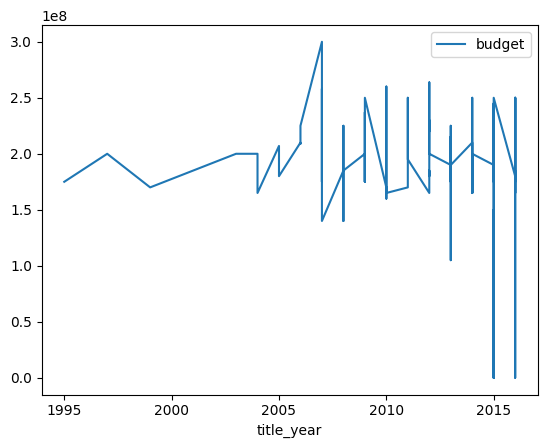

In [29]:
#3 - Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)

df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce').fillna(0)
df_cleaned = df[(df['title_year'] != 0) & (df['title_year'] != '?')]
df_cleaned['title_year'] = df_cleaned['title_year'].astype(int)

df_cleaned_sorted = df_cleaned.sort_values('title_year')

df_cleaned_sorted.plot(x='title_year', y='budget')

<Axes: xlabel='genre'>

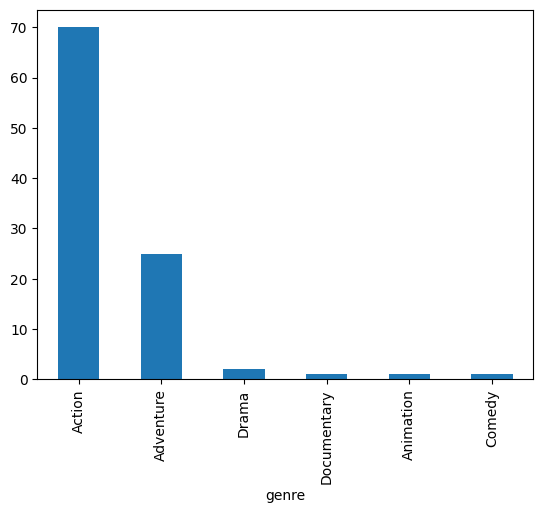

In [30]:
#4 - Uma plotagem do genero do filme.

df['genre'].value_counts().plot(kind='bar')

In [31]:
#5 - Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)

df_sorted_imdb = df.sort_values('imdb_score', ascending=False)
df_sorted_imdb.head(10)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,lucro
66,Color,Christopher Nolan,645.0,152.0,533316061.0,The Dark Knight,4667.0,USA,PG-13,185000000.0,2008.0,9.0,Action,348316061.0
97,Color,Christopher Nolan,642.0,148.0,292568851.0,Inception,2803.0,USA,PG-13,160000000.0,2010.0,8.8,Action,132568851.0
96,Color,Christopher Nolan,712.0,169.0,187991439.0,Interstellar,2725.0,USA,PG-13,165000000.0,2014.0,8.6,Adventure,22991439.0
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action,198130642.0
58,Color,Andrew Stanton,421.0,98.0,223806889.0,WALL·E,1043.0,USA,G,180000000.0,2008.0,8.4,Adventure,43806889.0
78,Color,Pete Docter,536.0,95.0,356454367.0,Inside Out,773.0,USA,PG,175000000.0,2015.0,8.3,Adventure,181454367.0
67,Color,Pete Docter,408.0,96.0,292979556.0,Up,704.0,USA,PG,175000000.0,2009.0,8.3,Adventure,117979556.0
43,Color,Lee Unkrich,453.0,103.0,414984497.0,Toy Story 3,733.0,USA,G,200000000.0,2010.0,8.3,Adventure,214984497.0
27,Color,Anthony Russo,516.0,147.0,407197282.0,Captain America: Civil War,1022.0,USA,PG-13,250000000.0,2016.0,8.2,Action,157197282.0
93,Color,Dean DeBlois,288.0,98.0,217387997.0,How to Train Your Dragon,492.0,USA,PG,165000000.0,2010.0,8.2,Adventure,52387997.0


In [54]:
#6 - Qual o Genero mais popular e menos popular?

df['genre'].value_counts()

# Calculate the average IMDB score for each genre
df_av_genre = df.groupby('genre')['imdb_score'].mean()
df_av_genre = df_av_genre.sort_values(ascending=False)
df_av_genre.round(2)

,imdb_score
genre,
Drama,7.50
Adventure,7.38
Documentary,7.10
Action,6.87
Animation,6.80
Comedy,5.40


Matriz de correlação:
               gross    budget  title_year  imdb_score     lucro
gross       1.000000  0.372436    0.159286    0.478522  0.940226
budget      0.372436  1.000000    0.381598    0.093060  0.034124
title_year  0.159286  0.381598    1.000000   -0.007721  0.031506
imdb_score  0.478522  0.093060   -0.007721    1.000000  0.481168
lucro       0.940226  0.034124    0.031506    0.481168  1.000000

Gráfico de correlação:


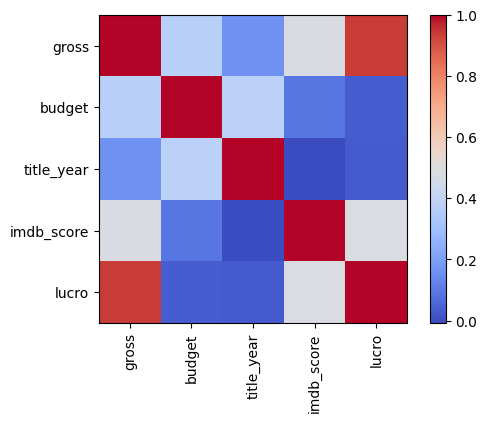

In [110]:
#7 - Existe relação entre os melhores filme e seu Budget (budget x imdb)?

numeric_df = df.select_dtypes(include=['number'])

correlation_map = numeric_df.corr()
print('Matriz de correlação:')
print(correlation_map)
print('')
print('Gráfico de correlação:')
plt.figure(figsize=(6, 4))
plt.imshow(correlation_map, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_map.columns)), correlation_map.columns, rotation=90)
plt.yticks(range(len(correlation_map.columns)), correlation_map.columns)
plt.show()

In [116]:
#8 - Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?

df_best_director = df.groupby('director_name')['imdb_score'].mean()
df_best_director = df_best_director.sort_values(ascending=False)

df_best_director = df_best_director.to_frame()

df_best_director['budget'] = df.groupby('director_name')['budget'].mean()

df_best_director.round(2)

,imdb_score,budget
director_name,,
Christopher Nolan,8.72,190000000.0
Lee Unkrich,8.30,200000000.0
Pete Docter,8.30,175000000.0
Dean DeBlois,8.20,165000000.0
Hideaki Anno,8.20,0.0
...,...,...
Martin Campbell,5.60,200000000.0
Lana Wachowski,5.40,176000000.0
Tom Shadyac,5.40,175000000.0


<ipython-input-125-0ac131cf929f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['title_year'] = df_cleaned['title_year'].astype(int)


<Axes: xlabel='title_year'>

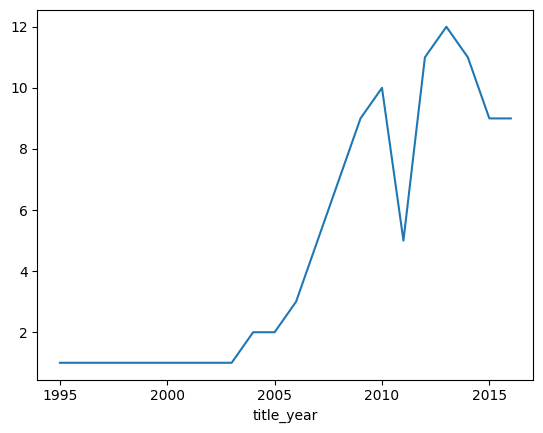

In [125]:
#9 - Mostre num gráfico a quantidade de filmes ao passar do ano

df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce').fillna(0)
df_cleaned = df[(df['title_year'] != 0) & (df['title_year'] != '?')]
df_cleaned['title_year'] = df_cleaned['title_year'].astype(int)

df_cleaned_sorted = df_cleaned.sort_values('title_year')

df_cleaned_sorted['title_year'].value_counts().sort_index().plot()